In [1]:
import sys
import os
sys.path.append('.\\neurokin\\')
import seaborn as sns
from matplotlib import pyplot as plt

In [2]:
from neurokin.kinematic_data import KinematicDataRun
from neurokin.neural_data import NeuralData
from neurokin.utils.neural import processing, neural_plot

## Experiment settings and runs to analyze

In [14]:
GAIT_PATH = "./neurokin/test_data/"
NEURAL_PATH = "./temp_data/neural/220915/ENWE_00052-220915-153059/"
CONFIGPATH = "./config.yaml"
GAIT_RECORDING_FS = 200
output_folder = "./"

## Reference markers and correction parameters.

The axis can be tilted or shifted (tilting of the runway, setting the origin in the middle..) so we set one reference marker on which to compute the linear trend of the tilt, and one for the shifting, then indicate all the columns that should be corrected for either. 

Finally we set which markers should be use to partition the steps.

In [15]:
shift_reference_marker = "lmtp_y"
tilt_reference_marker = "lmtp_z"
to_tilt = ["rshoulder_z", "rcrest_z", "rhip_z",
           "rknee_z", "rankle_z", "rmtp_z",
           "lshoulder_z", "lcrest_z", "lhip_z",
           "lknee_z", "lankle_z", "lmtp_z"]
to_shift = ["rshoulder_y", "rcrest_y", "rhip_y",
            "rknee_y", "rankle_y", "rmtp_y",
            "lshoulder_y", "lcrest_y", "lhip_y",
            "lknee_y", "lankle_y", "lmtp_y"]

step_left_marker = "lmtp"
step_right_marker = "rmtp"

## Get file names
Running through the selected folder to grab the names of all the .c3d files

In [16]:
c3d_files = []
for file in os.listdir(GAIT_PATH):
    if file.endswith(".c3d"):
        c3d_files.append(GAIT_PATH + file)
file = c3d_files[0]

## Here is where the magic happens.

- Runs through the files to analyze
- creates an object for each run, corrects the tilt and the shift
- computes the gait cycles bounds and prints it to a file for inspection
- computes all the angle joints set in the config file
- saves to csv

In [17]:
kin_data = KinematicDataRun(file, CONFIGPATH)       # creating a single run obj
kin_data.load_kinematics()

kin_data.compute_gait_cycles_bounds(left_marker=step_left_marker,   # computing left right bounds of steps
                                    right_marker=step_right_marker)
kin_data.print_step_partition(step_left_marker, step_right_marker, output_folder)  # print step partition for inspection only



(<AxesSubplot: title={'center': 'Left side'}>,
 <AxesSubplot: title={'center': 'Right side'}>)

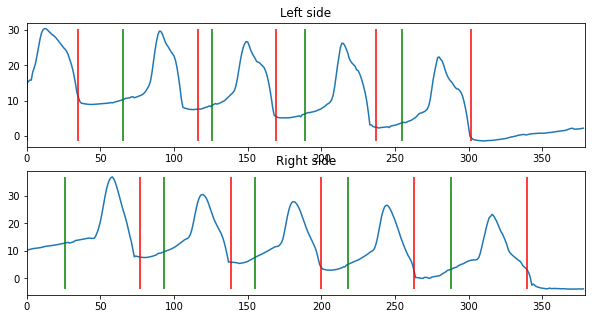

In [18]:
fig, axs = plt.subplots(2,1, figsize=(10,5))
kin_data.plot_step_partition(step_left_marker, step_right_marker, ax_l=axs[0], ax_r=axs[1])

# Neural analysis

The basics: *NeuralData*


In [8]:
neural_data = NeuralData(path=NEURAL_PATH)
neural_data.load_tdt_data(stream_name="NPr1", sync_present=True, stim_stream_name="Wav1")
neural_data.pick_sync_data(0)

Found Synapse note file: ./temp_data/neural/220915/ENWE_00052-220915-153059/Notes.txt
read from t=0s to t=19.65s


In [9]:
MIN_FOI = 10


MIN_POINTS = int(neural_data.fs * 1/(MIN_FOI/2))
POWER = MIN_POINTS.bit_length()
NFFT = 2**(POWER+2)


In [10]:
%matplotlib inline

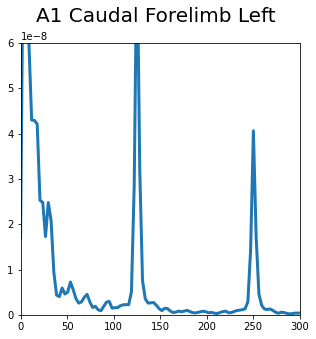

In [14]:
nfft= 2**13
NOV = nfft/8
freq, pxx = processing.calculate_power_spectral_density(neural_data.raw[5], neural_data.fs, 
                                                        nperseg=nfft, noverlap=NOV,
                                                        scaling="spectrum")
fig, ax = plt.subplots(figsize=(5,5))
fig.suptitle("A1 Caudal Forelimb Left", fontsize=20)

ax.set_xlim(0,300)
ax.set_ylim(0, 0.6*10**-7)

ax.plot(freq, pxx, linewidth=3)

Text(0.5, 0.98, 'Kinematic and Neural Correlation')

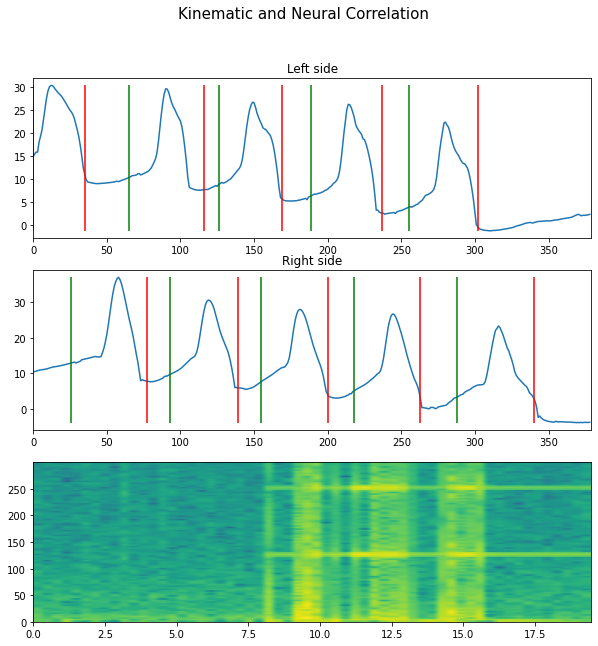

In [13]:
fig, axs = plt.subplots(3, 1, figsize=(10,10))

kin_data.plot_step_partition(step_left_marker, step_right_marker, ax_l=axs[0], ax_r=axs[1])
neural_plot.plot_spectrogram(ax=axs[2], fs=neural_data.fs, raw=neural_data.raw[5], ylim=[0,300], 
                             tick_spacing=50, nfft=nfft, noverlap=NOV)



fig.suptitle("Kinematic and Neural Correlation", fontsize=15)